In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

plt.rcParams["figure.figsize"] = (20, 6)

rng = np.random.default_rng(21)

# Dataset

URL: https://archive.ics.uci.edu/dataset/73/mushroom

Here is the task of binary classification of Agaricaceae (to which Champignon belongs) and Lepiota mushrooms into two classes: edible and poisonous.
The dataset consists of 8416 lines for two classes (edible 53.3% and poisonous 46.7%). There are 22 categorical traits available:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# Exploratory data analysis

In [2]:
data = pd.read_csv('../data/Mushroom_dataset', delimiter=',',
                   names=['class-label', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
                          'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
                          'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
                          'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
                          'spore-print-color', 'population', 'habitat'])

In [3]:
data.head()

,class-label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [4]:
data.shape

(8416, 23)

No missing data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class-label               8416 non-null   object
 1   cap-shape                 8416 non-null   object
 2   cap-surface               8416 non-null   object
 3   cap-color                 8416 non-null   object
 4   bruises                   8416 non-null   object
 5   odor                      8416 non-null   object
 6   gill-attachment           8416 non-null   object
 7   gill-spacing              8416 non-null   object
 8   gill-size                 8416 non-null   object
 9   gill-color                8416 non-null   object
 10  stalk-shape               8416 non-null   object
 11  stalk-root                8416 non-null   object
 12  stalk-surface-above-ring  8416 non-null   object
 13  stalk-surface-below-ring  8416 non-null   object
 14  stalk-color-above-ring  

In [6]:
data['class-label'].value_counts()

EDIBLE       4488
POISONOUS    3928
Name: class-label, dtype: int64

<Axes: xlabel='class-label', ylabel='count'>

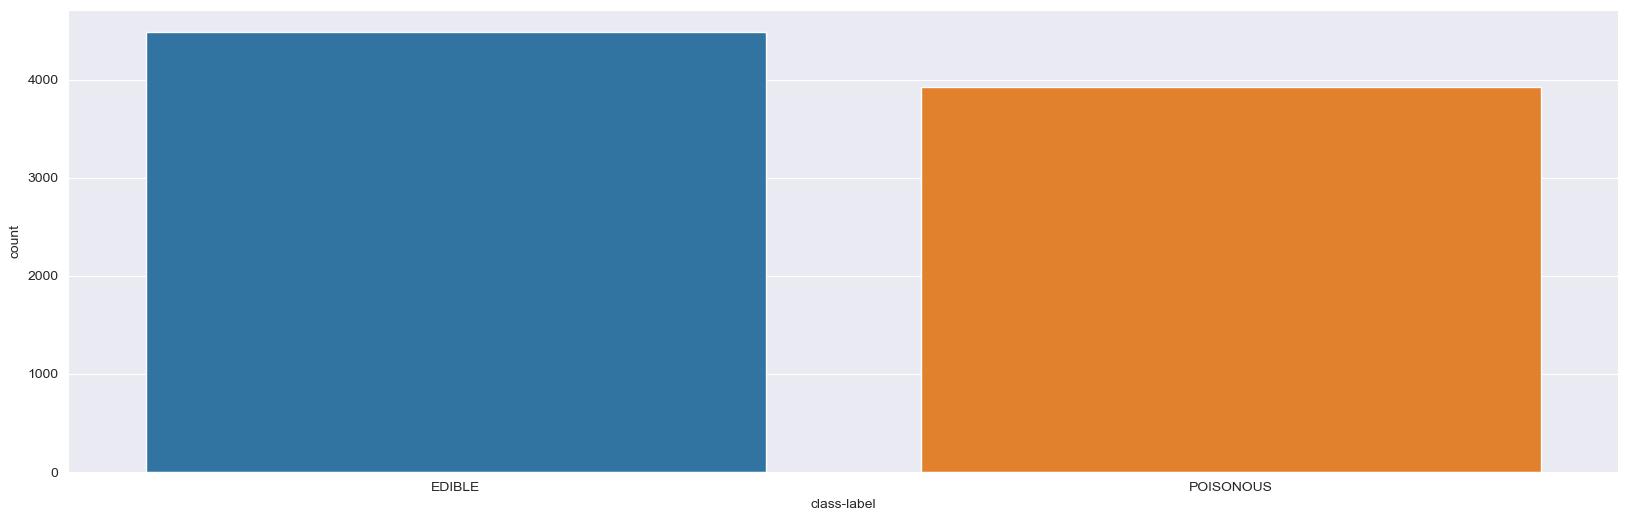

In [7]:
sns.countplot(data, x='class-label')

In [8]:
data.describe().T

,count,unique,top,freq
class-label,8416,2,EDIBLE,4488
cap-shape,8416,6,CONVEX,3796
cap-surface,8416,4,SCALY,3268
cap-color,8416,10,BROWN,2320
bruises,8416,2,NO,5040
odor,8416,9,NONE,3808
gill-attachment,8416,2,FREE,8200
gill-spacing,8416,2,CLOSE,6824
gill-size,8416,2,BROAD,5880
gill-color,8416,12,BUFF,1728


Remove the features with mod 1

In [9]:
data = data.drop(['veil-type'], axis=1)

In [10]:
data.shape[1]

22

## Distributions

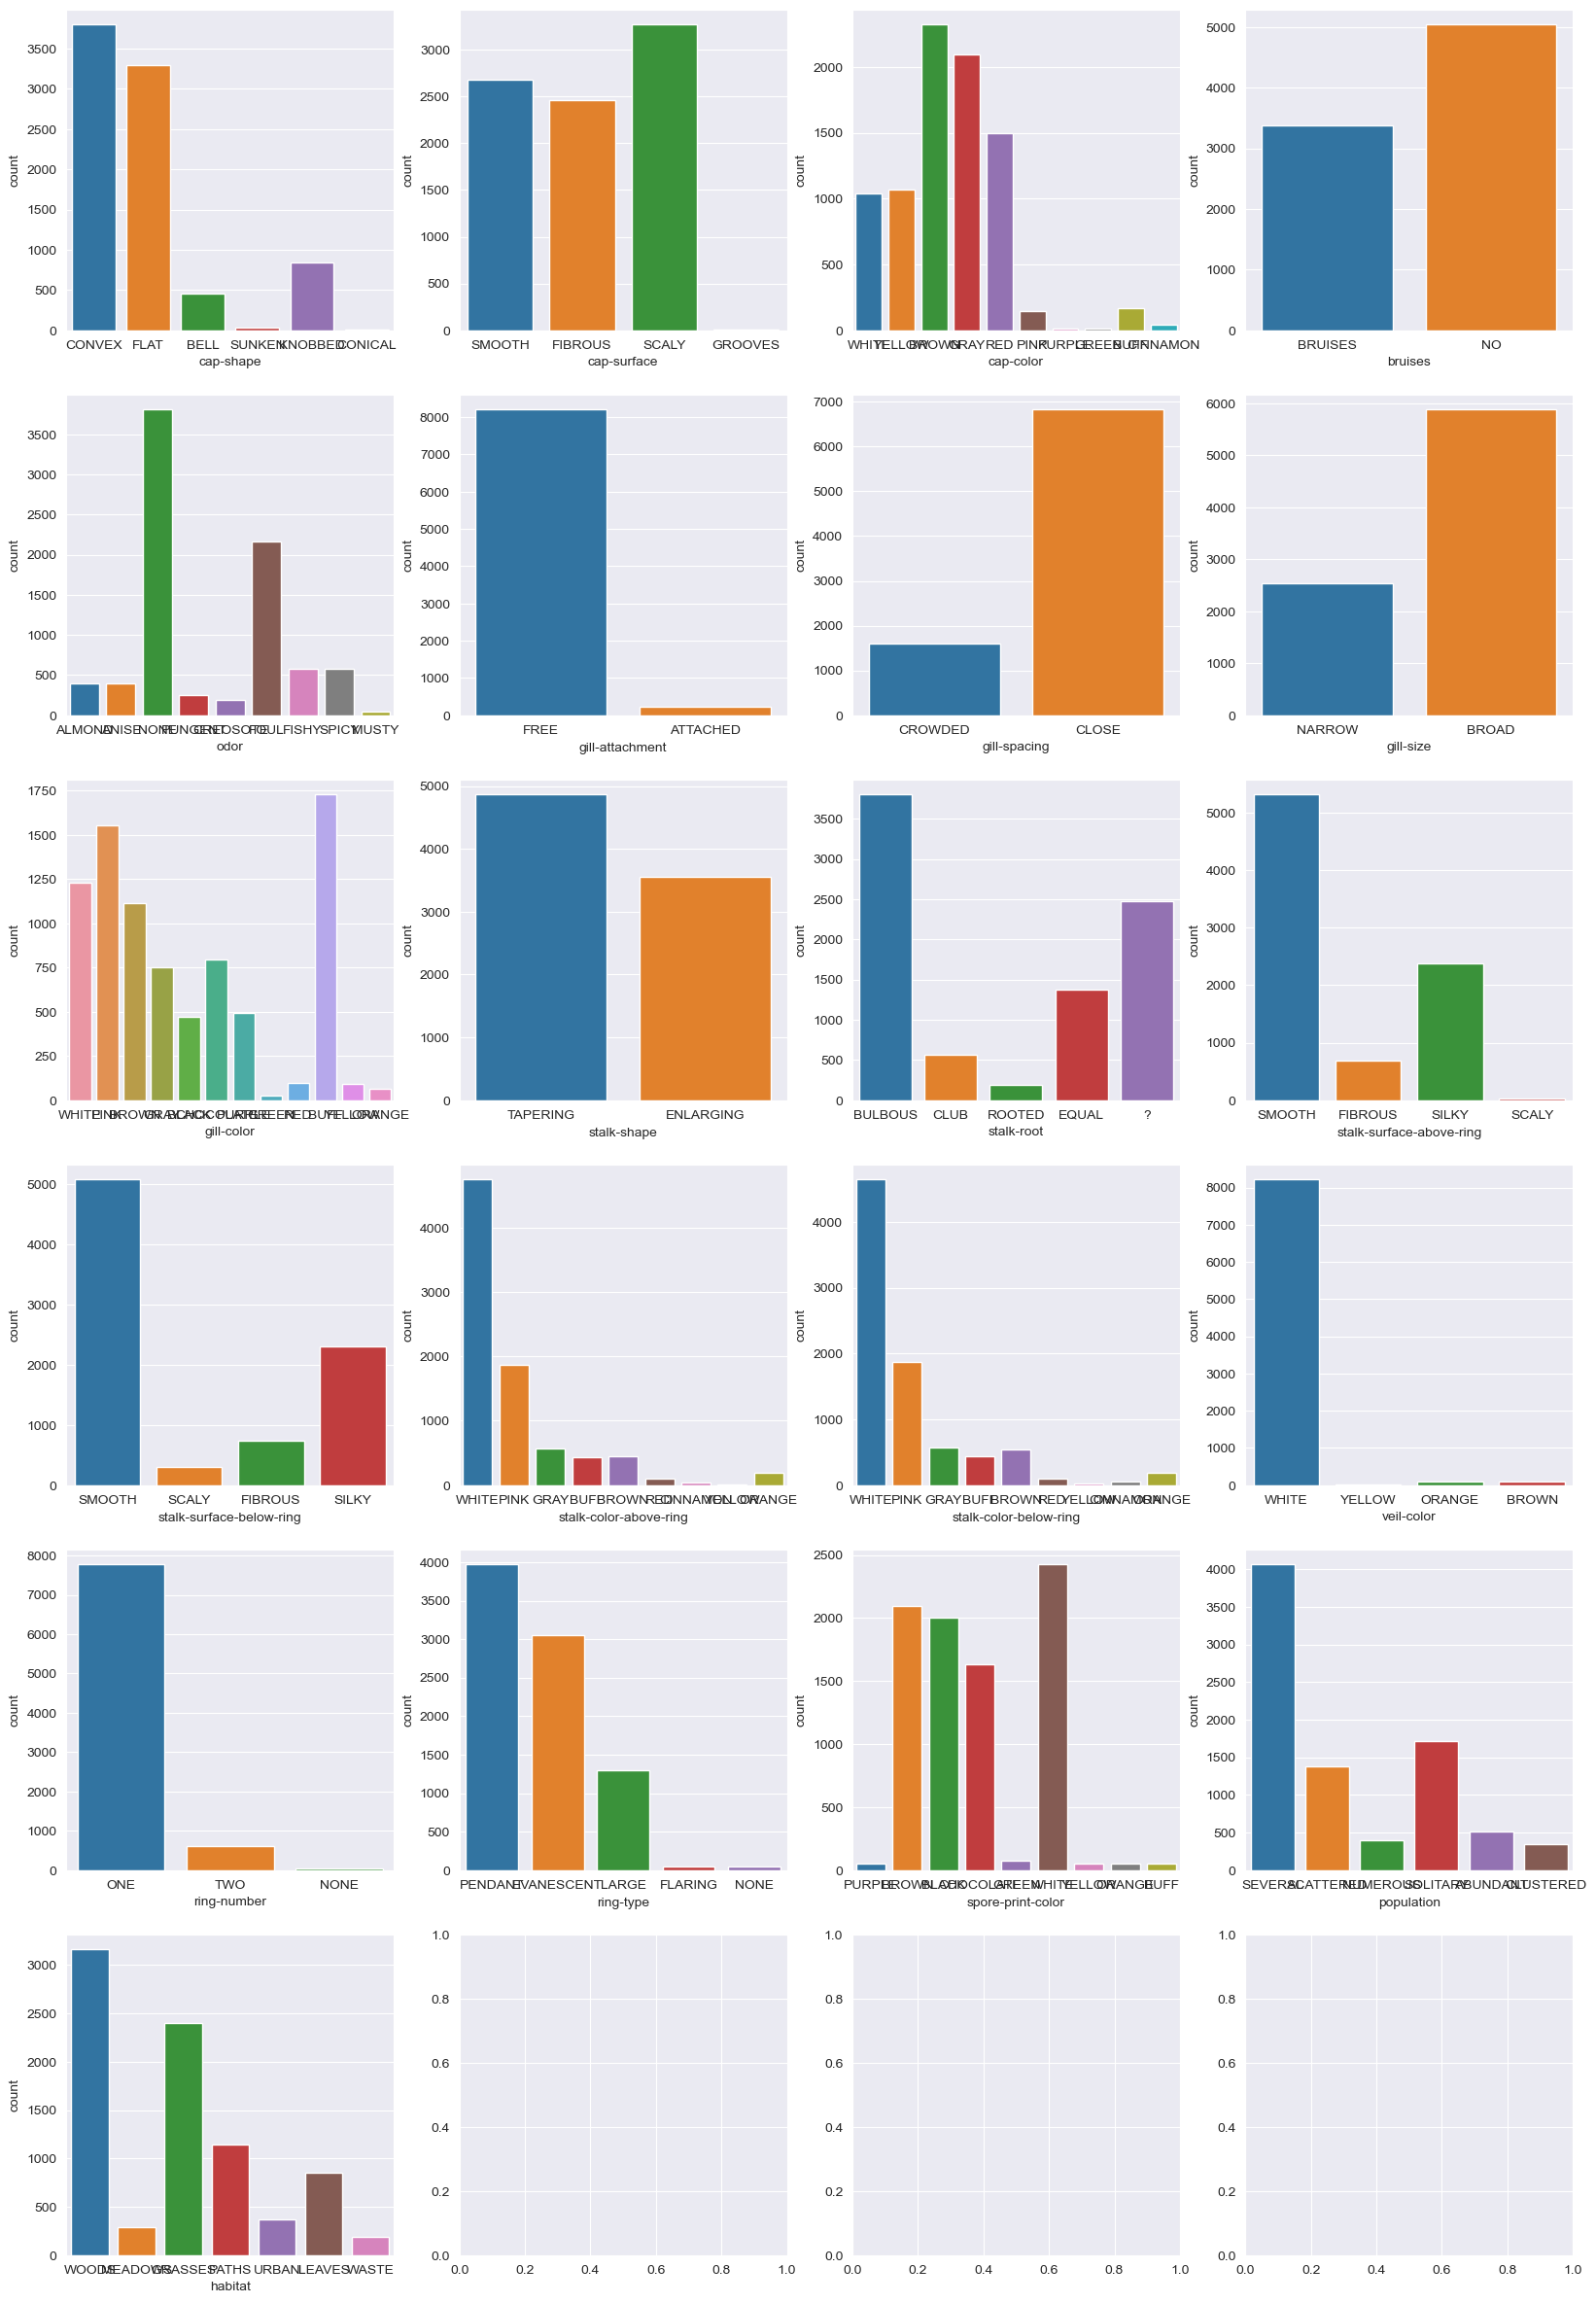

In [11]:
f, ax = plt.subplots(6, 4, figsize=(20, 30))

i = j = 0
for column in data.columns[1:]:
    if j == 4:
        j = 0
        i += 1

    sns.countplot(data, x=column, ax=ax[i, j])

    j += 1

Remove the features with big classes imbalance

In [12]:
data = data.drop(['gill-attachment', 'veil-color'], axis=1)

## Heatmap

No heatmap because all features are categorical

## Feature importance

In [13]:
le = preprocessing.LabelEncoder()

for column_name in data.columns:
    data[column_name] = le.fit_transform(data[column_name])

In [14]:
data.head()

,class-label,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,3,8,0,0,1,1,10,1,1,3,3,7,7,1,4,6,4,6
1,0,2,3,8,0,0,1,1,10,1,1,3,3,7,7,1,4,1,4,6
2,0,2,3,8,0,0,1,1,7,1,1,3,3,7,7,1,4,6,4,6
3,0,2,3,8,0,0,1,1,7,1,1,3,3,7,7,1,4,1,4,6
4,0,2,3,8,0,0,1,1,1,1,1,3,3,7,7,1,4,6,4,6


In [15]:
data.dtypes

class-label                 int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

In [16]:
X = data.drop('class-label', axis=1)
Y = data['class-label']

In [17]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,8,0,0,1,1,10,1,1,3,3,7,7,1,4,6,4,6
1,2,3,8,0,0,1,1,10,1,1,3,3,7,7,1,4,1,4,6
2,2,3,8,0,0,1,1,7,1,1,3,3,7,7,1,4,6,4,6
3,2,3,8,0,0,1,1,7,1,1,3,3,7,7,1,4,1,4,6
4,2,3,8,0,0,1,1,1,1,1,3,3,7,7,1,4,6,4,6


In [18]:
np.unique(Y)

array([0, 1])

In [19]:
clf = RandomForestClassifier(criterion='entropy', random_state=0)
clf.fit(X, Y)

RandomForestClassifier(criterion='entropy', random_state=0)

<Axes: >

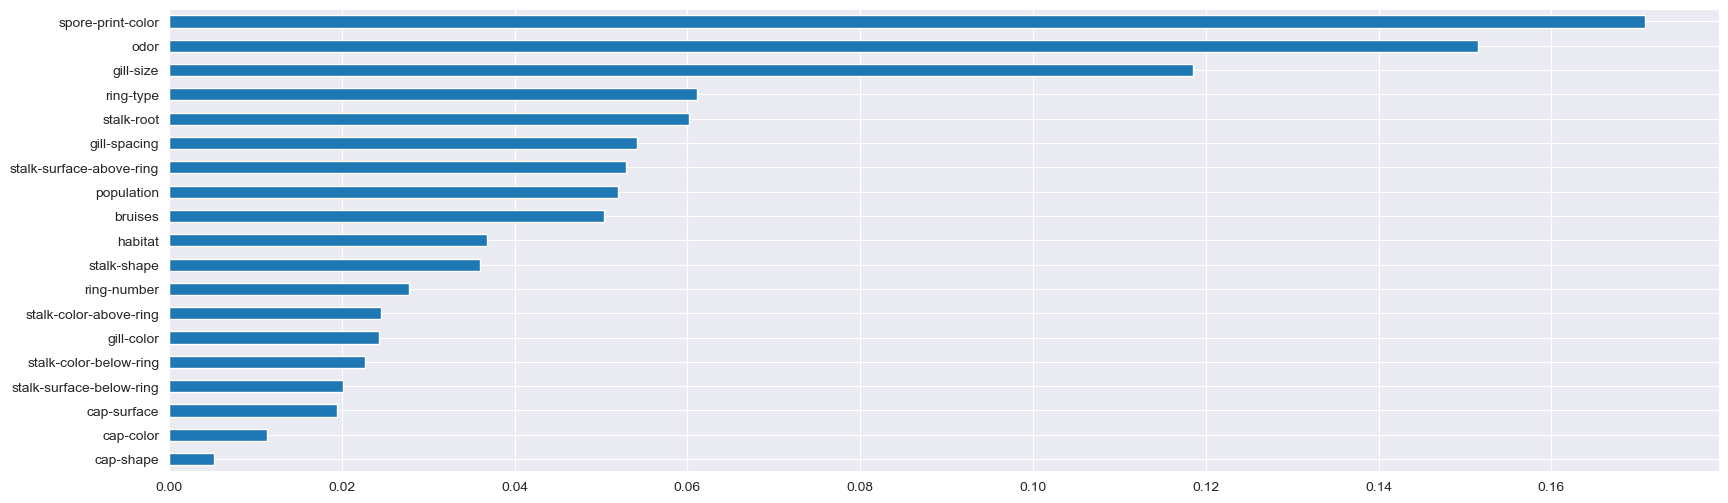

In [20]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values()
feat_importances.plot(kind='barh')

Remove the feature with the least importance

In [21]:
data = data.drop(['cap-shape'], axis=1)

In [22]:
data.shape

(8416, 19)

In [26]:
data.head()

,class-label,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,0,0,1,1,10,1,1,3,3,7,7,1,4,6,4,6
1,0,3,8,0,0,1,1,10,1,1,3,3,7,7,1,4,1,4,6
2,0,3,8,0,0,1,1,7,1,1,3,3,7,7,1,4,6,4,6
3,0,3,8,0,0,1,1,7,1,1,3,3,7,7,1,4,1,4,6
4,0,3,8,0,0,1,1,1,1,1,3,3,7,7,1,4,6,4,6


## Saving the data

In [30]:
data.to_csv('../data/prepared_data.csv', index=False, mode='w')